In [5]:
from tensorflow.keras.models import load_model

model = load_model("deepfake_classifier_model.h5")  # Use your saved filename

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your new image (can be .jpg or .png)
img_path = r"C:\Users\krish\Downloads\DeepFakesDetectionSys\Fake\0001 (94).jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))  # match training size
img_array = image.img_to_array(img)
img_array = img_array / 255.0                           # normalize
img_array = np.expand_dims(img_array, axis=0)          # add batch dimension

In [21]:
prediction = model.predict(img_array)

# Since it's binary classification, the output is a probability (0.0–1.0)
if prediction[0][0] > 0.5:
    print("Prediction: 🟢 REAL  (Confidence: {:.2f}%)".format(prediction[0][0] * 100))
else:
    print("Prediction: 🔴 FAKE(Confidence: {:.2f}%)".format((1 - prediction[0][0]) * 100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: 🔴 FAKE(Confidence: 61.41%)


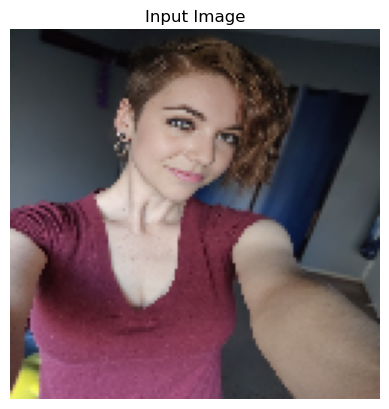

In [23]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()